In [514]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [517]:
# set configuration
sample_size, nr_sample, nr_moments = 500, 20, 5

# classificatio
test_size, cv = 0.2, 5
cv_config = [test_size, cv]

## Bounded distributions

In [518]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [519]:
moments_df = dem.get_moments(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,label
0,0.494175,0.124499,-0.000363,0.023306,-0.000051,arcsine
1,0.488927,0.130996,0.002909,0.024616,0.001100,arcsine
2,0.504626,0.127649,0.000492,0.023769,0.000118,arcsine


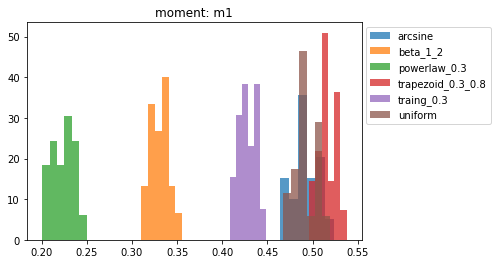

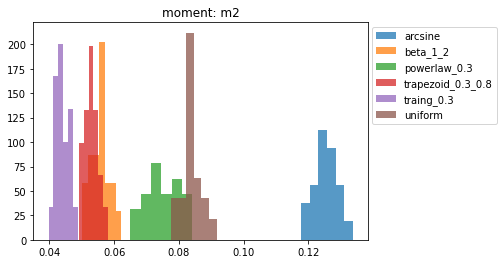

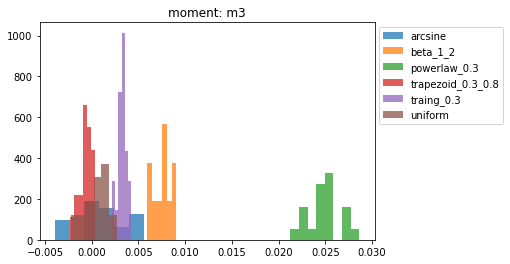

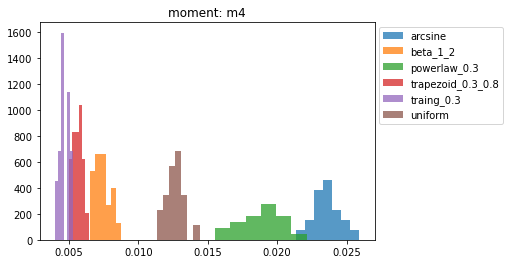

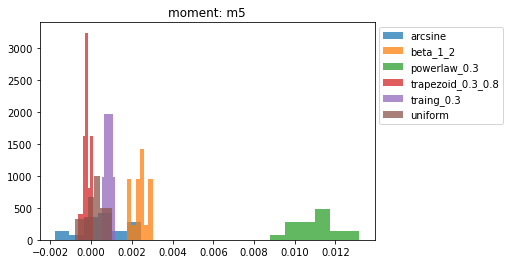

In [520]:
dem.get_histogram_of_moments(moments_df)

In [453]:
# setting values for cross validation
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
nr_moments_list = list(range(2,31))

### svm

In [454]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, cv_config, 1)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

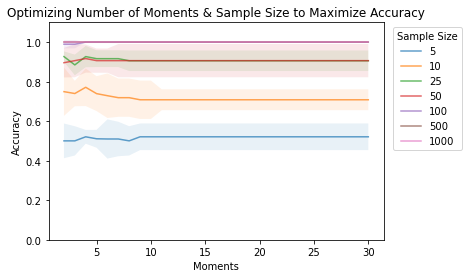

In [455]:
cm.plot_cv_moments(res_svm)

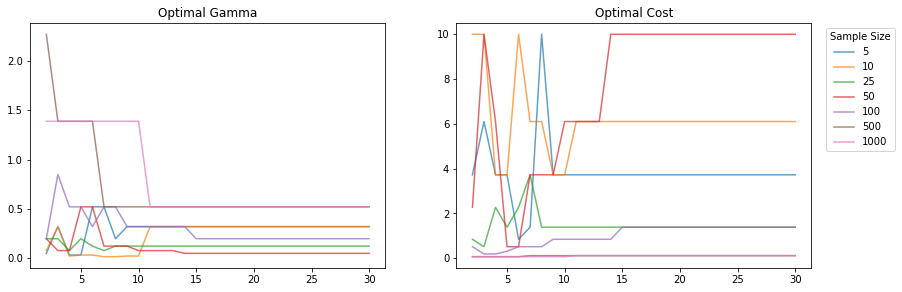

In [456]:
cm.plot_cv_h_params(res_svm)

### Logistic Regression

In [457]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, cv_config, 2)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

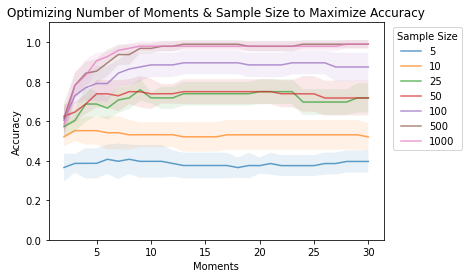

In [458]:
cm.plot_cv_moments(res_lr)

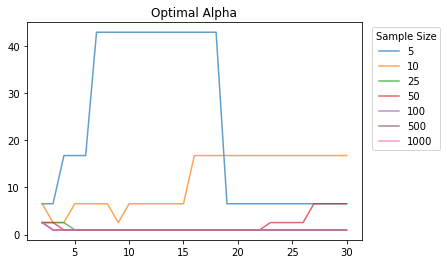

In [459]:
cm.plot_cv_h_params(res_lr)

In [118]:
import json
res_svm['nr_moments'] = [int(i) for i in res_svm['nr_moments']]
res_lr['nr_moments'] = [int(i) for i in res_lr['nr_moments']]

with open('results/moments/res_svm_bounded.json', 'w') as f:
    json.dump(res_svm, f)

with open('results/moments/res_lr_bounded.json', 'w') as f:
    json.dump(res_lr, f)

## Heavytail distributions

In [460]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [478]:
moments_df = dem.get_moments(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,label
0,0.845658,0.397410,0.261877,0.656344,0.951615,1.791350,3.079871,5.591461,10.025515,18.222360,cauchy
1,0.833168,0.313010,0.107524,0.226670,0.164191,0.234226,0.230186,0.292348,0.325953,0.400384,cauchy
2,0.867590,0.757973,1.336796,4.112298,11.828892,35.901773,109.501767,336.574863,1037.221529,3201.743730,cauchy


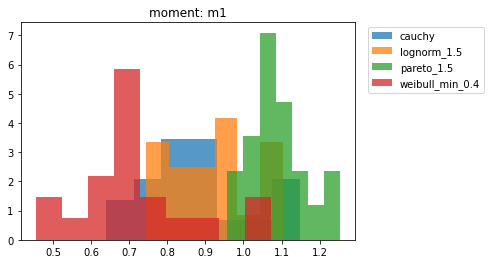

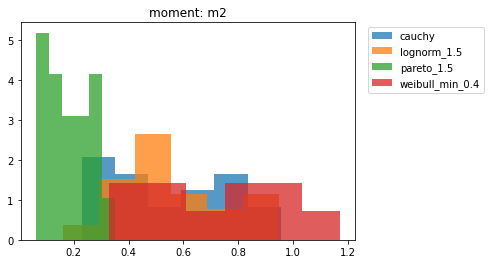

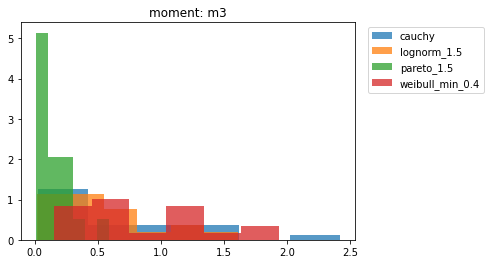

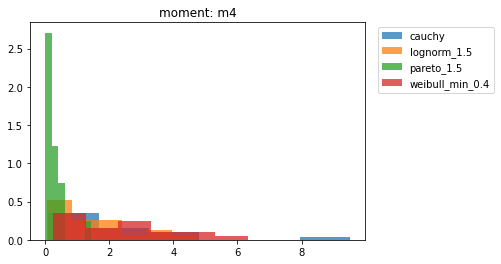

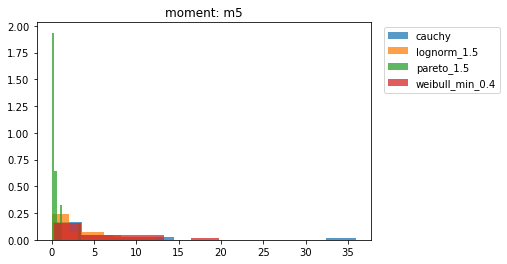

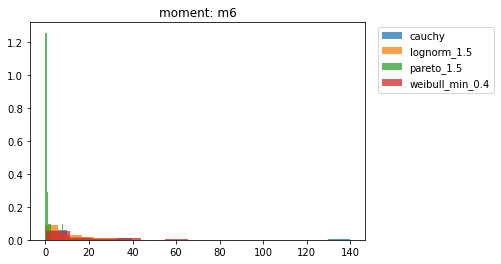

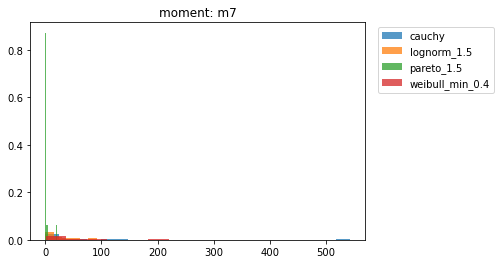

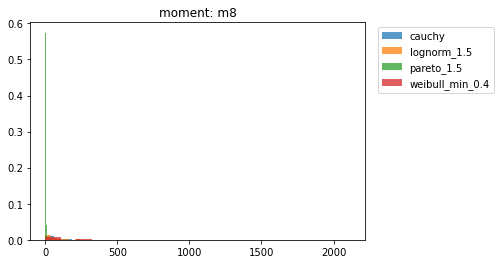

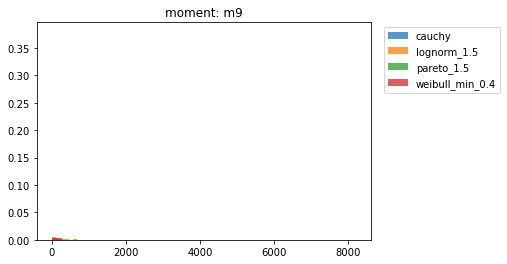

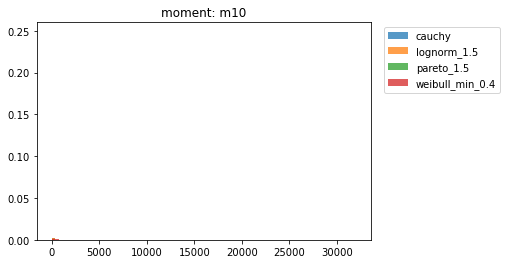

In [479]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [480]:
res_svm_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, cv_config, 1, transform = True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

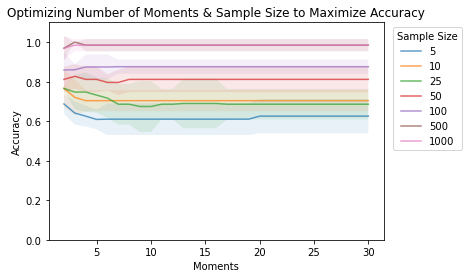

In [481]:
cm.plot_cv_moments(res_svm_ht)

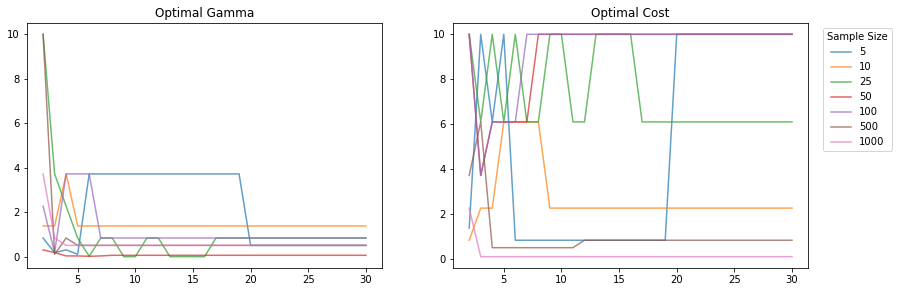

In [482]:
cm.plot_cv_h_params(res_svm_ht)

### Logistic Regression

In [522]:
res_lr_ht = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample, cv_config, 2, transform=True)

Completed:   0%|          | 0/7 [00:00<?, ?it/s]

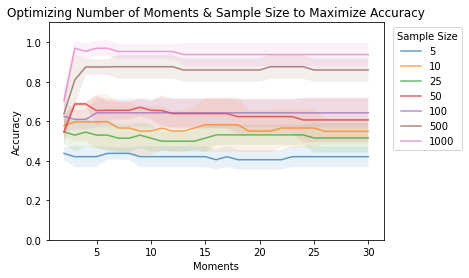

In [523]:
cm.plot_cv_moments(res_lr_ht)

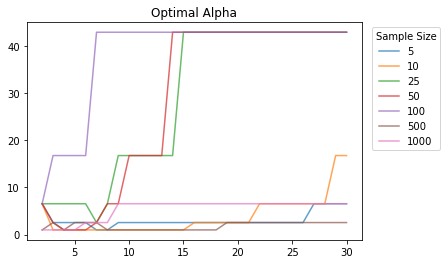

In [524]:
cm.plot_cv_h_params(res_lr_ht)

In [126]:
import json
res_svm_ht['nr_moments'] = [int(i) for i in res_svm_ht['nr_moments']]
res_lr_ht['nr_moments'] = [int(i) for i in res_lr_ht['nr_moments']]

with open('results/moments/res_svm_heavytail.json', 'w') as f:
    json.dump(res_svm_ht, f)

with open('results/moments/res_lr_heavytail.json', 'w') as f:
    json.dump(res_lr_ht, f)